In [ ]:
import pandas as pd
import glob, pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
        from datetime import datetime, timedelta
from matplotlib.ticker import LinearLocator
import matplotlib.dates as mdates
from scipy.signal import savgol_filter

def to_datetime(date):

    timestamp = ((date - np.datetime64('1970-01-01T00:00:00'))
                 / np.timedelta64(1, 's'))
    return datetime.utcfromtimestamp(timestamp)

In [447]:
def read_pkl(path):
    
    freqmin = 1000 
    freqmax = 30000
    
    file = open(path, 'rb')
    array = pickle.load(file)
    freq = array['freq']
    file.close()
    alldate = array['time']
    newarray = array['50pct']

    fidx = np.where((freq>=freqmin)& (freq<=freqmax))
    ampdict = {'time': alldate, 
                'amp':np.max(newarray[fidx, :], axis=1)[0] }
    damp = pd.DataFrame(ampdict)
    plt.figure(figsize=(15,2))
    plt.plot(alldate,ampdict['amp'] , 'lightgrey')
    plt.plot(alldate,savgol_filter(ampdict['amp'], window_length=3, polyorder=1, mode='nearest'),'k', alpha=0.8)
    plt.ylim(70, 85)
    return damp

[]
eee
['/Volumes/Data/Soundscape/Hobo/Keelung/2023/230609-230627.xlsx']
['/Volumes/home/DataBase/PAM_pickle/2023/Keelung_060909-062522-5min.pkl']
2023-06-11
2023-06-12
2023-06-13
2023-06-14
2023-06-15
2023-06-16
2023-06-17
2023-06-18
2023-06-19
2023-06-20
2023-06-21
2023-06-22
2023-06-23
2023-06-24
['/Volumes/Data/Soundscape/Hobo/Keelung/2023/230829-230914.xlsx']


/var/folders/l2/zyrmtcyj7zn13lz9xk4l96zw0000gn/T/ipykernel_8084/1325450544.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dh_ = dh[dh['time']>=np.datetime64(f'{year}-{str(month).zfill(2)}-{str(day).zfill(2)} 00:00:00')][dh['time']<=np.datetime64(f'{year}-{str(month).zfill(2)}-{str(day).zfill(2)} 23:59:59')]
/var/folders/l2/zyrmtcyj7zn13lz9xk4l96zw0000gn/T/ipykernel_8084/1325450544.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  damp_ = damp[damp['time']>=datetime(year, month, day, 17, 30)][damp['time']<=datetime(year, month, day, 20, 0)]


['/Volumes/home/DataBase/PAM_pickle/2023/Keelung_082912-091404-5min.pkl']
2023-08-30
2023-08-31
2023-09-02
2023-09-04
2023-09-05
2023-09-06
2023-09-07
2023-09-08
2023-09-09
2023-09-10
2023-09-11
2023-09-12
2023-09-13


/var/folders/l2/zyrmtcyj7zn13lz9xk4l96zw0000gn/T/ipykernel_8084/1325450544.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dh_ = dh[dh['time']>=np.datetime64(f'{year}-{str(month).zfill(2)}-{str(day).zfill(2)} 00:00:00')][dh['time']<=np.datetime64(f'{year}-{str(month).zfill(2)}-{str(day).zfill(2)} 23:59:59')]
/var/folders/l2/zyrmtcyj7zn13lz9xk4l96zw0000gn/T/ipykernel_8084/1325450544.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  damp_ = damp[damp['time']>=datetime(year, month, day, 17, 30)][damp['time']<=datetime(year, month, day, 20, 0)]


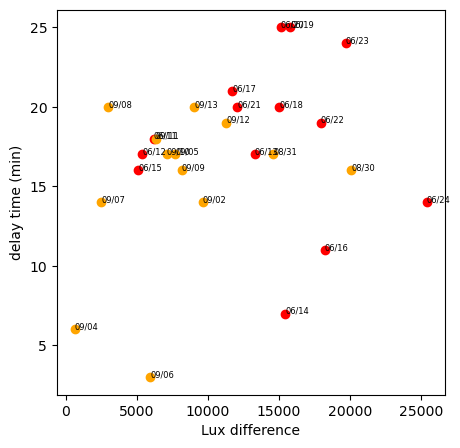

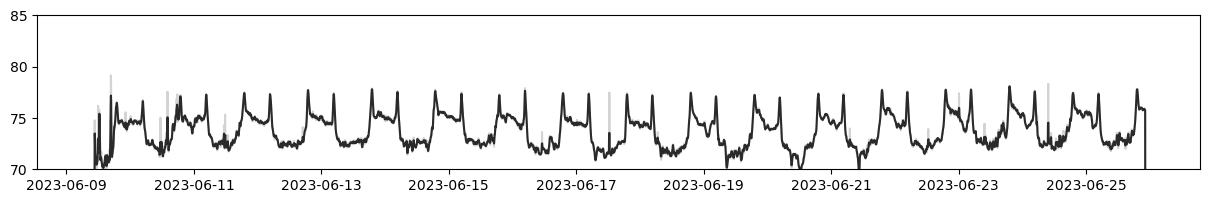

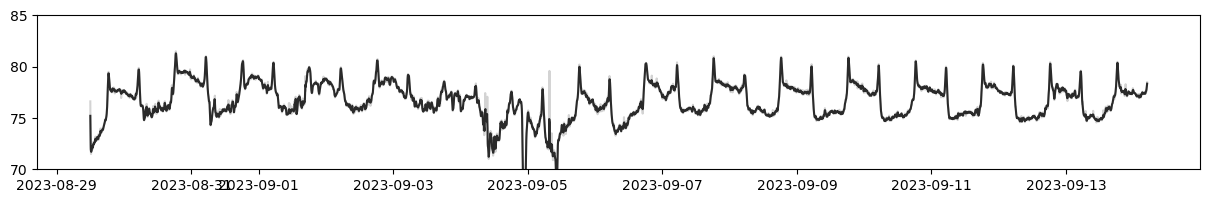

In [449]:
year = 2023
place='Keelung'
dsun = pd.read_csv(f'../DataBase/Data_CWA/sunset_time_keelung{year}.csv')
name = ['idx', 'time', 'temp', 'lux']

#============================
fig, ax = plt.subplots(1, figsize=(5,5))
df_dict = {'diff_lux':[],
          'diff_amp':[],
          'index':[]}
for mmm in ['04', '06', '08']:
    if mmm == '04':
        color = 'skyblue'
    elif mmm == '06':
        color = 'red'
    elif mmm == '08':
        color = 'orange'
    hobo = glob.glob(f'/Volumes/Data/Soundscape/Hobo/{place}/{year}/??{mmm}*.xlsx')
    print(hobo)
    try:
    
        dh = pd.read_excel(hobo[0], names = name)

        pklpath = glob.glob(f'/Volumes/home/DataBase/PAM_pickle/{year}/{place}_{mmm}*pkl')
        print(pklpath)
        damp = read_pkl(pklpath[0])

        time = to_datetime(dh['time'].values[0])
        dict_lux = {'time':[], 'diff':[]}
        # fig, ax = plt.subplots(1, figsize=(12,3))
        for i in range(0, 16):
            if i != 0 :
                month = time.month
                day = time.day
                sunset = (dsun['SUNSET'][dsun['TIME']==f'{year}/{month}/{day}'].values[0]).rsplit(':')
                dh_ = dh[dh['time']>=np.datetime64(f'{year}-{str(month).zfill(2)}-{str(day).zfill(2)} 00:00:00')][dh['time']<=np.datetime64(f'{year}-{str(month).zfill(2)}-{str(day).zfill(2)} 23:59:59')]
                min_lux = min(dh_['lux']); max_lux = max(dh_['lux'])
                diff_lux = max_lux-min_lux
                # dict_lux['time'].append(datetime(year, month, day))
                # dict_lux['diff'].append(diff_lux)

                damp_ = damp[damp['time']>=datetime(year, month, day, 17, 30)][damp['time']<=datetime(year, month, day, 20, 0)]
                max_idx = damp_['amp'].argmax()
                max_time = to_datetime(damp_['time'].values[max_idx])


                delta_time = max_time - datetime(year, month, day, int(sunset[0]), int(sunset[1]))
                delay = delta_time.total_seconds()/60
                max_amp = max(damp_['amp'])
                min_amp = min(damp_['amp'])
                delay_amp = max_amp-min_amp
                if diff_lux > 0 and delay > 0  : 
                    ax.scatter(diff_lux, delay, color=color)
                    ax.text(diff_lux, delay, s = f'{str(month).zfill(2)}/{str(day).zfill(2)}', color='k', fontsize=6)
                    # print(f'{year}-{str(month).zfill(2)}-{str(day).zfill(2)}')

                    df_dict['diff_lux'].append(diff_lux)
                    df_dict['diff_amp'].append(delay)
                    df_dict['index'].append(mmm)
            time = time + timedelta(days=1) 
    except: 
        print('eee')

    # plt.ylim(0,7)
    # plt.xlim(0,8000)
    ax.set_xlabel('Lux difference')
    ax.set_ylabel('delay time (min)')

In [451]:
my_rho = np.corrcoef(df_dict['diff_lux'],df_dict['diff_amp'])

In [452]:
my_rho

array([[1.       , 0.2497732],
       [0.2497732, 1.       ]])